<a href="https://colab.research.google.com/github/yunuxemre/Data-Mining-Example/blob/master/TitanikVeriAnaliziV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('TitanicV2.csv')

In [3]:
titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


<ipython-input-5-25b952dcfba3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_c.loc[:, 'survived'] = titanic_c['survived'].map({0:'No', 1:'Yes'})


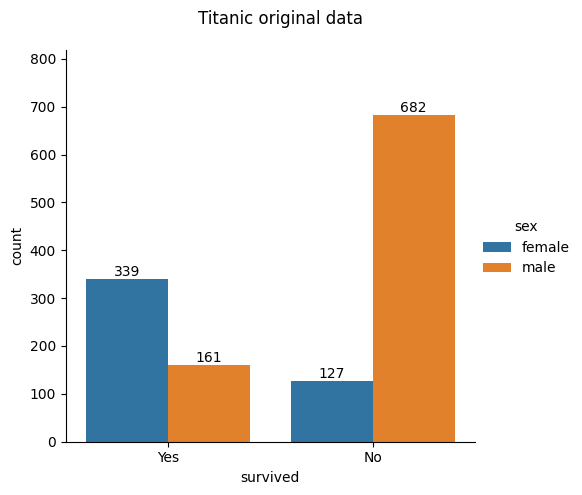

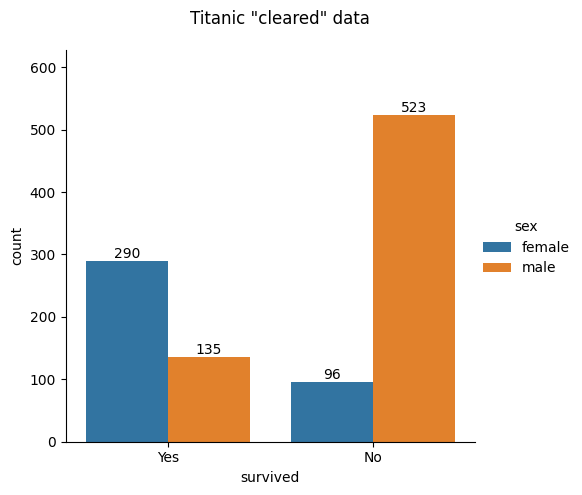

In [5]:
titanic_c = titanic.dropna(subset=['age','embarked'])

titanic.loc[:, 'survived'] = titanic['survived'].map({0:'No', 1:'Yes'})
titanic_c.loc[:, 'survived'] = titanic_c['survived'].map({0:'No', 1:'Yes'})


g1 = sns.catplot(x = 'survived', data = titanic, kind = 'count', hue = 'sex', legend = True)

for ax in g1.axes.ravel():


    for c in ax.containers:
        labels = [f'{(v.get_height()):.0f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

g1.fig.subplots_adjust(top=0.9)
g1.fig.suptitle('Titanic original data')

g2 = sns.catplot(x = 'survived', data = titanic_c, kind = 'count', hue = 'sex')


for ax in g2.axes.ravel():

    for c in ax.containers:
        labels = [f'{(v.get_height()):.0f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

g2.fig.subplots_adjust(top=0.9)
g2.fig.suptitle('Titanic "cleared" data')

plt.show()

In [6]:
titanic[['age', 'sex']].groupby('sex').mean()

,age
sex,
female,28.687071
male,30.585233


In [7]:
titanic[['age', 'sex']].groupby('sex').min()

,age
sex,
female,0.1667
male,0.3333


In [8]:
titanic[['age', 'sex']].groupby('sex').max()

,age
sex,
female,76.0
male,80.0


<Axes: xlabel='sex', ylabel='age'>

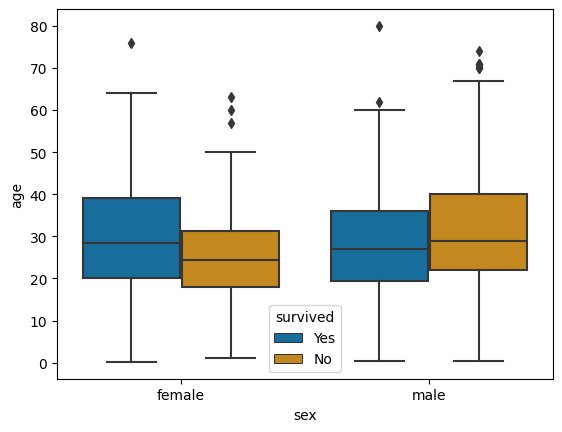

In [9]:
sns.boxplot(data=titanic, x='sex', y='age', hue='survived', palette='colorblind')


<Axes: xlabel='sex', ylabel='age'>

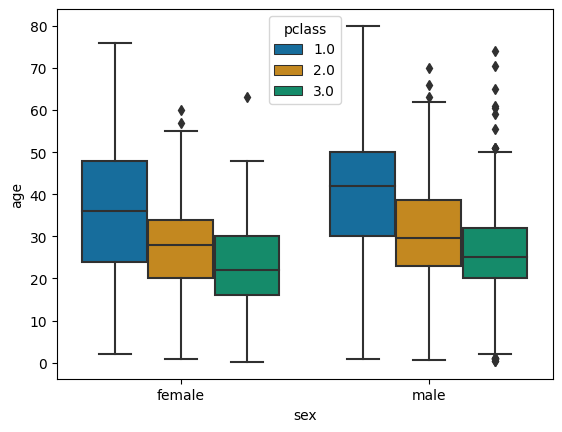

In [10]:
sns.boxplot(titanic, x = 'sex', y = 'age', hue = 'pclass', palette = 'colorblind')

<Axes: xlabel='pclass', ylabel='fare'>

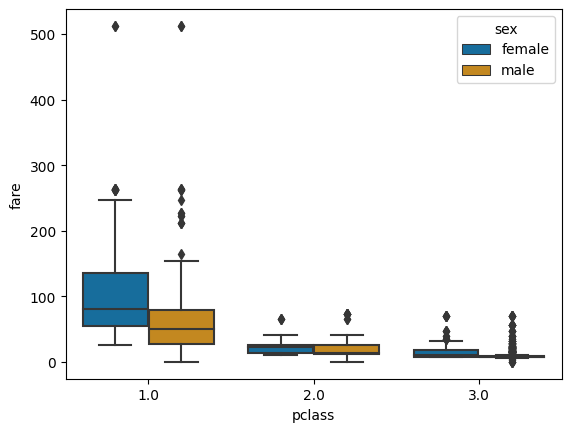

In [11]:
sns.boxplot(titanic, x = 'pclass', y = 'fare', hue = 'sex', palette = 'colorblind')

In [12]:
titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,Yes,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,Yes,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,No,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,No,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,No,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,Yes,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,Yes,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,No,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,Yes,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,No,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [13]:
titanic['age'].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

In [14]:
def remove_outliers_iqr(data, column_name):
    q1 = titanic['age'].quantile(0.25)
    q3 = titanic['age'].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.3 * iqr
    titanic_age_cleaned = titanic[(titanic['age'] >= lower_bound) & (titanic['age'] <= upper_bound)]
    return titanic_age_cleaned
titanic_age_cleaned = remove_outliers_iqr(titanic, 'age')

print("Before removing outliers:")
print(titanic['age'].describe())

print("\nAfter removing outliers:")
print(titanic_age_cleaned['age'].describe())

Before removing outliers:
count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

After removing outliers:
count    1024.000000
mean       29.075358
std        13.447945
min         0.166700
25%        21.000000
50%        28.000000
75%        38.000000
max        62.000000
Name: age, dtype: float64


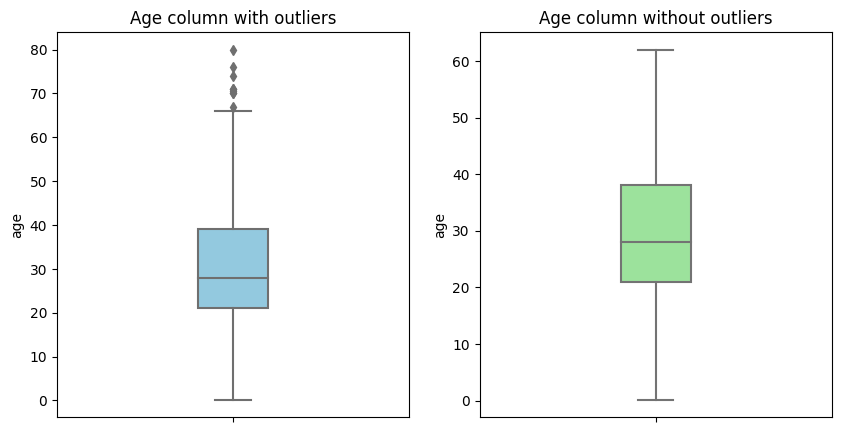

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(ax = axes[0], data = titanic, y = 'age', width = .2, color = 'skyblue')
axes[0].set_title('Age column with outliers')

sns.boxplot(ax = axes[1], data = titanic_age_cleaned, y = 'age', width = .2, color = 'lightgreen')
axes[1].set_title('Age column without outliers')

plt.show()

In [16]:
def remove_outliers_std(data, column_name):
    mean = titanic['fare'].mean()
    std = titanic['fare'].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 4 * std
    titanic_fare_cleaned = titanic[(titanic['fare'] >= lower_bound) & (titanic['fare'] <= upper_bound)]

    return titanic_fare_cleaned

titanic_fare_cleaned = remove_outliers_std(titanic, 'fare')

print("Before removing outliers:")
print(titanic['fare'].describe())

print("\nAfter removing outliers:")
print(titanic_fare_cleaned['fare'].describe())

Before removing outliers:
count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

After removing outliers:
count    1288.000000
mean       28.993775
std        36.748888
min         0.000000
25%         7.895800
50%        14.254150
75%        30.070800
max       227.525000
Name: fare, dtype: float64


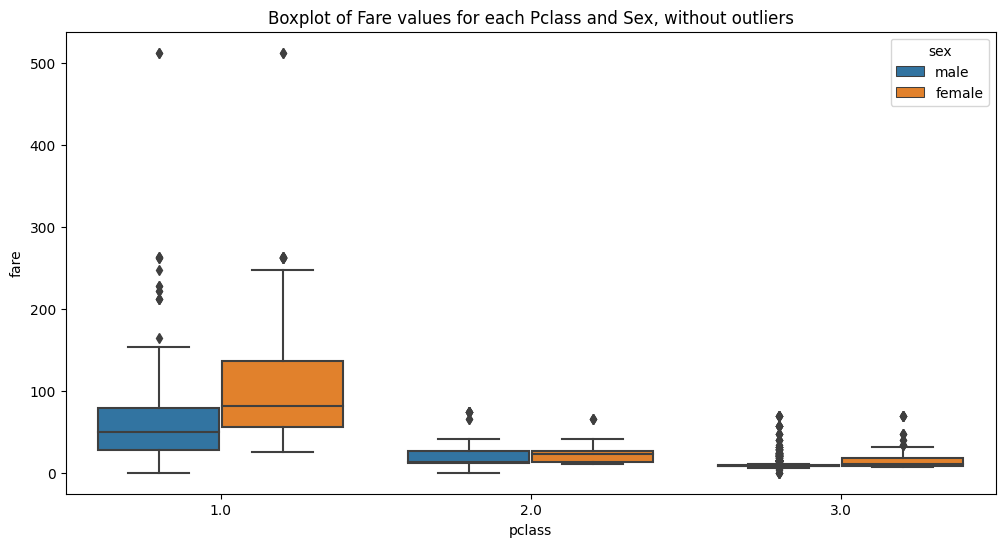

In [17]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='pclass', y='fare', hue='sex', data=titanic, hue_order=['male', 'female'])
plt.title('Boxplot of Fare values for each Pclass and Sex, without outliers')
plt.show()

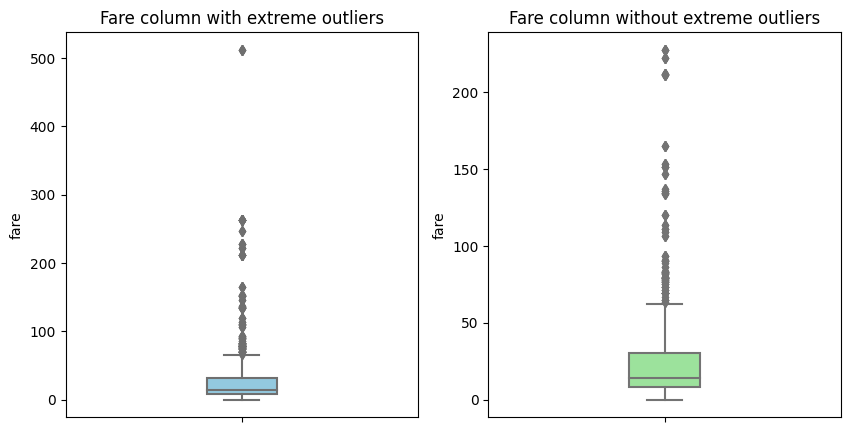

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(ax = axes[0], data = titanic, y = 'fare', width = .2, color = 'skyblue')
axes[0].set_title('Fare column with extreme outliers')

sns.boxplot(ax = axes[1], data = titanic_fare_cleaned, y = 'fare', width = .2, color = 'lightgreen')
axes[1].set_title('Fare column without extreme outliers')

plt.show()

In [19]:
mean = titanic_fare_cleaned['fare'].mean()
std = titanic_fare_cleaned['fare'].std()
threshold = mean + 2.5 * std
print(threshold)

titanic_fare_cleaned.loc[titanic_fare_cleaned['fare'] > threshold, 'fare'] = threshold
titanic = titanic_fare_cleaned


print("\nAfter removing outliers:")
print(titanic_fare_cleaned['fare'].describe())

120.86599419417084

After removing outliers:
count    1288.000000
mean       27.074910
std        29.056440
min         0.000000
25%         7.895800
50%        14.254150
75%        30.070800
max       120.865994
Name: fare, dtype: float64


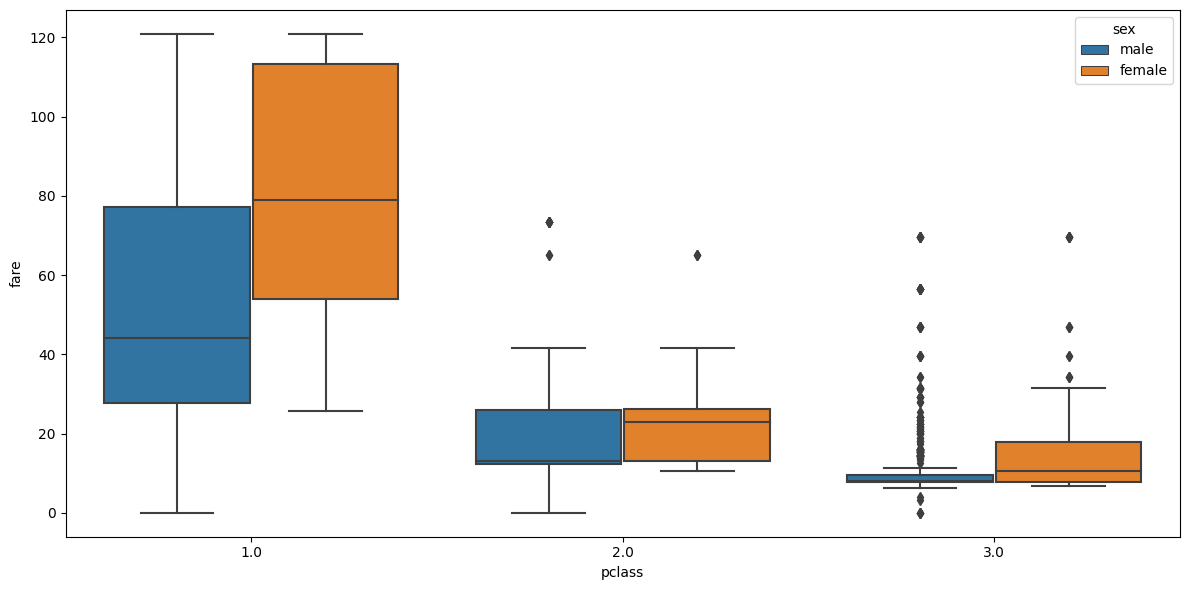

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='pclass', y='fare', hue='sex', hue_order=['male', 'female'], data=titanic)

plt.tight_layout()

plt.show()


After removing values above 30:
count    216.000000
mean      12.615993
std        5.088057
min        6.750000
25%        7.775000
50%       10.489600
75%       17.850000
max       20.000000
Name: fare, dtype: float64


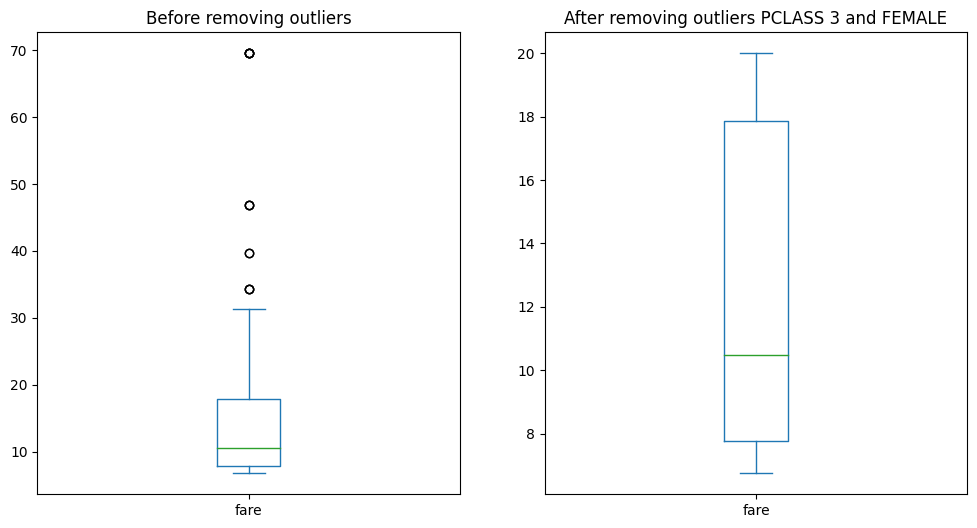

In [21]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
titanic[(titanic['pclass'] == 3) & (titanic['sex'] == 'female')]['fare'].plot(kind='box')
plt.title('Before removing outliers')


def remove_values_above_threshold_for_fare(data, pclass, sex, threshold):
    condition = (data['pclass'] == pclass) & (data['sex'] == sex) & (data['fare'] > threshold)
    data.loc[condition, 'fare'] = threshold
    return data

cleaned_data = remove_values_above_threshold_for_fare(titanic, 3, 'female', 20)


print("\nAfter removing values above 30:")
print(cleaned_data[(cleaned_data['pclass'] == 3) & (cleaned_data['sex'] == 'female')]['fare'].describe())


plt.subplot(1, 2, 2)
cleaned_data[(cleaned_data['pclass'] == 3) & (cleaned_data['sex'] == 'female')]['fare'].plot(kind='box')
plt.title('After removing outliers PCLASS 3 and FEMALE')


plt.show()




After removing values above 15:
count    492.000000
mean       9.474964
std        3.197826
min        0.000000
25%        7.750000
50%        7.895800
75%        9.586450
max       15.000000
Name: fare, dtype: float64


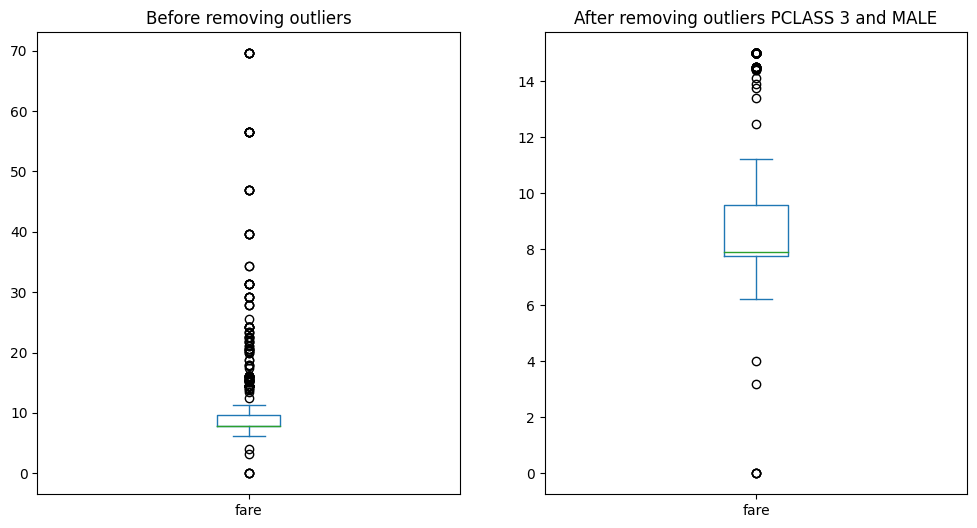

In [22]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
titanic[(titanic['pclass'] == 3) & (titanic['sex'] == 'male')]['fare'].plot(kind='box')
plt.title('Before removing outliers')


def remove_values_above_threshold_for_fare_male(data, pclass, sex, threshold):
    condition = (data['pclass'] == pclass) & (data['sex'] == sex) & (data['fare'] > threshold)
    data.loc[condition, 'fare'] = threshold
    return data

cleaned_data = remove_values_above_threshold_for_fare_male(titanic, 3, 'male', 15)


print("\nAfter removing values above 15:")
print(cleaned_data[(cleaned_data['pclass'] == 3) & (cleaned_data['sex'] == 'male')]['fare'].describe())


plt.subplot(1, 2, 2)
cleaned_data[(cleaned_data['pclass'] == 3) & (cleaned_data['sex'] == 'male')]['fare'].plot(kind='box')
plt.title('After removing outliers PCLASS 3 and MALE')

plt.show()



In [23]:

titanic = remove_outliers_iqr(titanic, 'age')

titanic = remove_outliers_std(titanic, 'fare')

titanic = remove_values_above_threshold_for_fare(titanic, 3, 'female', 20)

titanic = remove_values_above_threshold_for_fare_male(titanic, 3, 'male', 15)


titanic = titanic.drop(['cabin','body','home.dest', 'boat'], axis=1)


titanic.to_csv('Titanic_cleaned.csv', index=False)

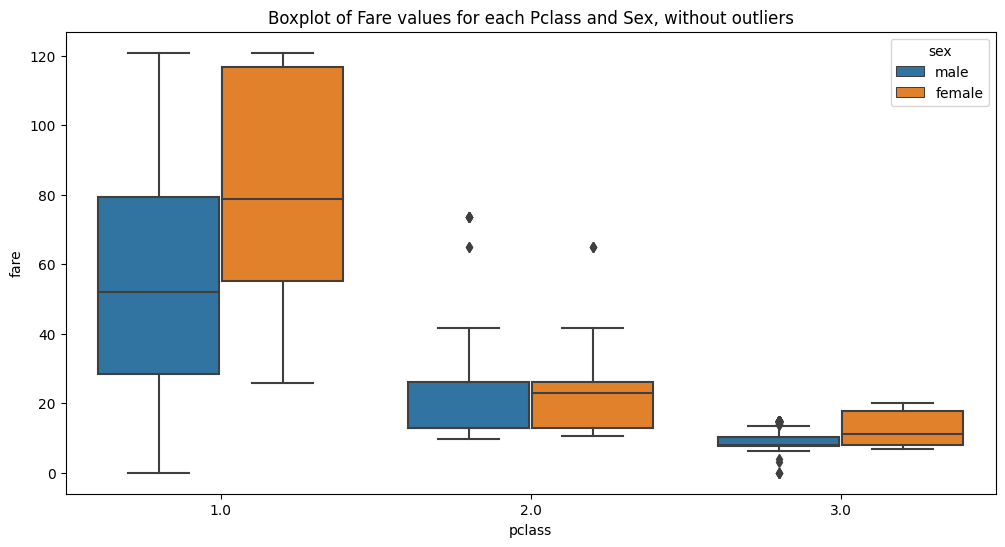

In [24]:
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.boxplot(x='pclass', y='fare', hue='sex', data=titanic, hue_order=['male', 'female'])
plt.title('Boxplot of Fare values for each Pclass and Sex, without outliers')
plt.show()


In [25]:
titanic = pd.read_csv('Titanic_cleaned.csv')
titanic.head(4)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,Yes,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,120.865994,S
1,1.0,Yes,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,120.865994,S
2,1.0,No,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,120.865994,S
3,1.0,No,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,120.865994,S


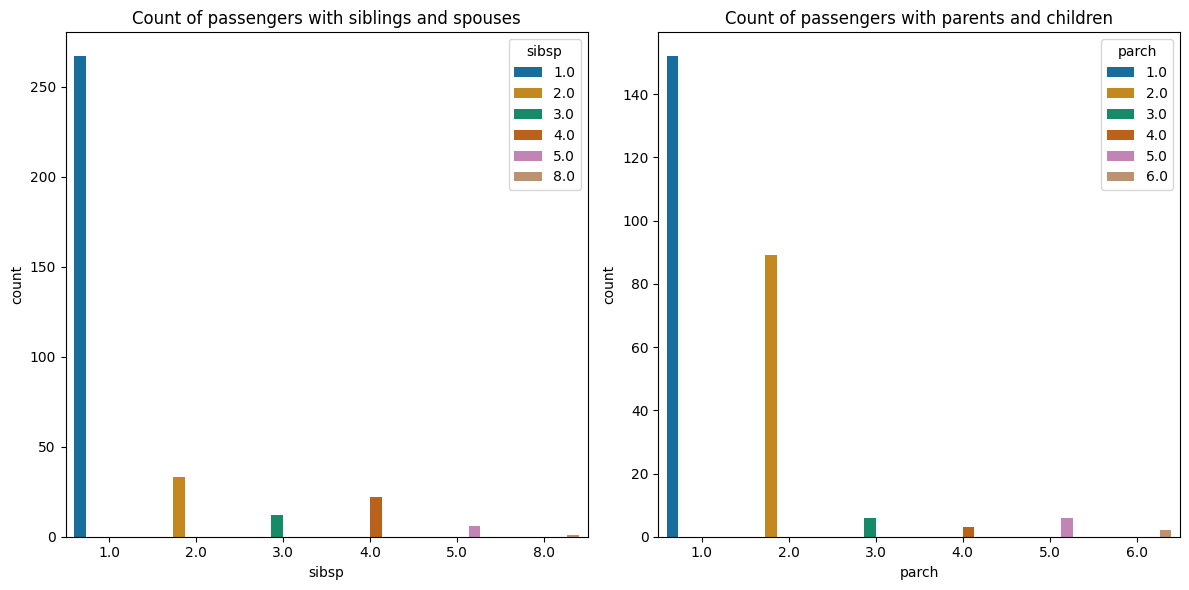

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(ax=axes[0], data=titanic[titanic['sibsp'] > 0], x='sibsp', hue='sibsp', palette='colorblind')
axes[0].set_title('Count of passengers with siblings and spouses') #Kardeşleri ve eşleri olan yolcuların sayısı

sns.countplot(ax=axes[1], data=titanic[titanic['parch'] > 0], x='parch', hue = 'parch', palette='colorblind')
axes[1].set_title('Count of passengers with parents and children') #Ebeveynleri ve çocukları olan yolcu sayısı

plt.tight_layout()

plt.show()

In [27]:
children = titanic[titanic['age'] < 15]
children.count()

pclass      108
survived    108
name        108
sex         108
age         108
sibsp       108
parch       108
ticket      108
fare        108
embarked    108
dtype: int64

<Axes: xlabel='pclass', ylabel='count'>

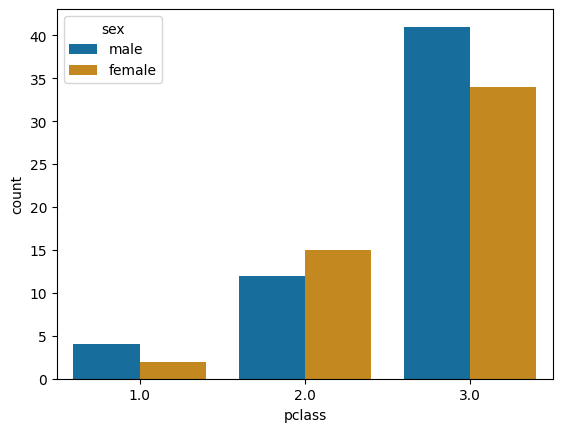

In [28]:
import seaborn as sns

sns.countplot(data=children, x='pclass', hue='sex', palette='colorblind', dodge=True)


<Axes: xlabel='age', ylabel='Count'>

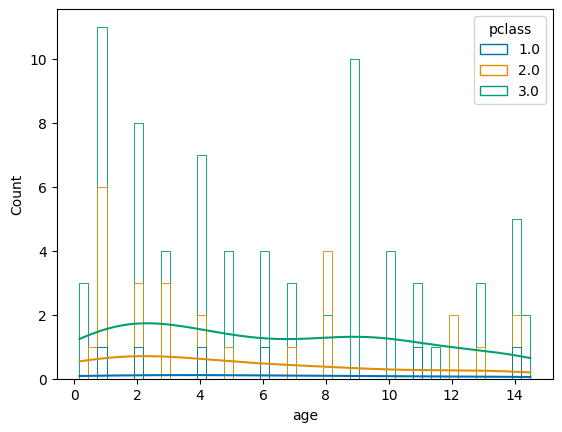

In [29]:
sns.histplot(children, x = 'age', hue = 'pclass', palette = 'colorblind', bins = 50, fill = False, kde = True)

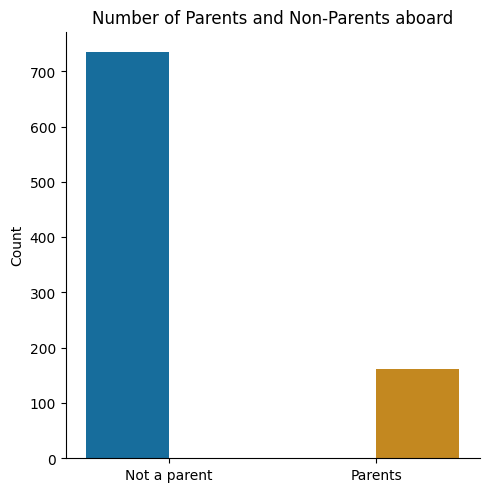

In [30]:
titanic_adults = titanic[titanic['age'] >= 15].copy()

titanic_adults.loc[:, 'ParchGroup'] = titanic_adults['parch'].map({0: 'Not a parent', 1: 'Parents', 2: 'Parents', 3: 'Parents', 4: 'Parents', 5: 'Parents', 6: 'Parents'})

sns.catplot(data=titanic_adults, x='ParchGroup', kind='count', hue='ParchGroup', palette='colorblind', legend = False)

plt.xlabel('')
plt.ylabel('Count')
plt.title('Number of Parents and Non-Parents aboard') # Gemideki Ebeveyn ve Ebeveyn Olmayanların Sayısı

plt.show()

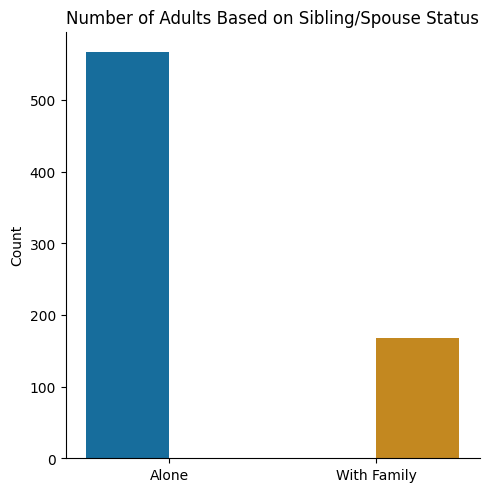

In [31]:
titanic_adults.loc[:, 'SibSpGroup'] = titanic_adults['sibsp'].map({0: 'Alone', 1: 'With Family', 2: 'With Family', 3: 'With Family', 4: 'With Family', 5: 'With Family'})

sns.catplot(data=titanic_adults[titanic_adults['ParchGroup'] != 'Parents'], x='SibSpGroup', kind='count', hue='SibSpGroup', hue_order = ['Alone', 'With Family'], palette='colorblind', legend = False, order = ['Alone', 'With Family'])

plt.xlabel('')
plt.ylabel('Count')
plt.title('Number of Adults Based on Sibling/Spouse Status') # Kardeş / eş durumuna göre yetişkin sayısı

plt.show()

In [32]:
titanic = pd.read_csv('Titanic_cleaned.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,Yes,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,120.865994,S
1,1.0,Yes,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,120.865994,S
2,1.0,No,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,120.865994,S
3,1.0,No,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,120.865994,S
4,1.0,No,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,120.865994,S


Text(0.5, 1.0, 'Survival Rates Across Passenger Classes')

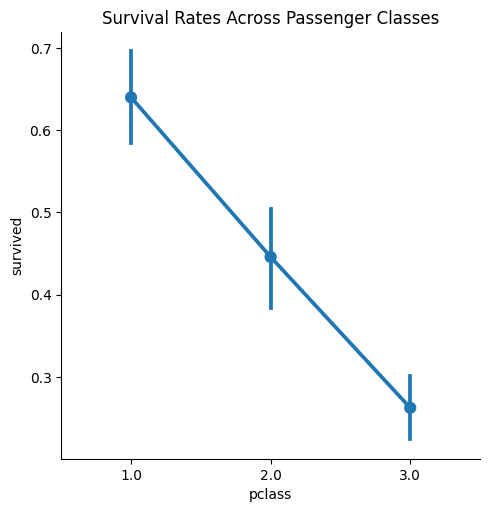

In [33]:

titanic['survived'] = titanic['survived'].map({'Yes':1, 'No':0})

sns.catplot(data=titanic, x='pclass', y='survived', kind='point')
plt.title('Survival Rates Across Passenger Classes') # Yolcu sınıfları arasında hayatta kalma oranları

Text(0.5, 1.0, 'Age and Survival Rate: Linear Regression')

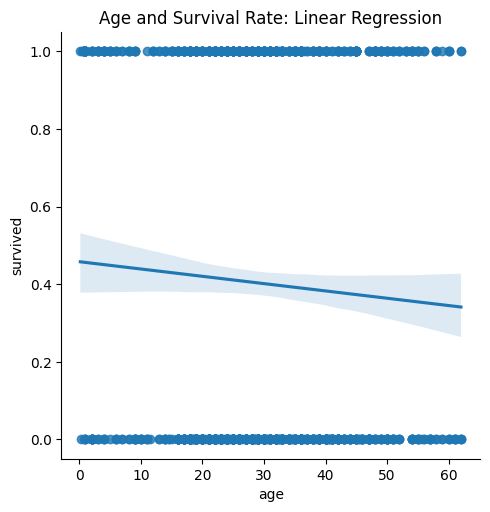

In [34]:
sns.lmplot(data=titanic, x='age', y='survived', palette='colorblind')
plt.title('Age and Survival Rate: Linear Regression') # Yaş ve Hayatta Kalma Oranı: Doğrusal Regresyon

Text(0.5, 1.0, 'Age, Survival, and Passenger Class Relationship')

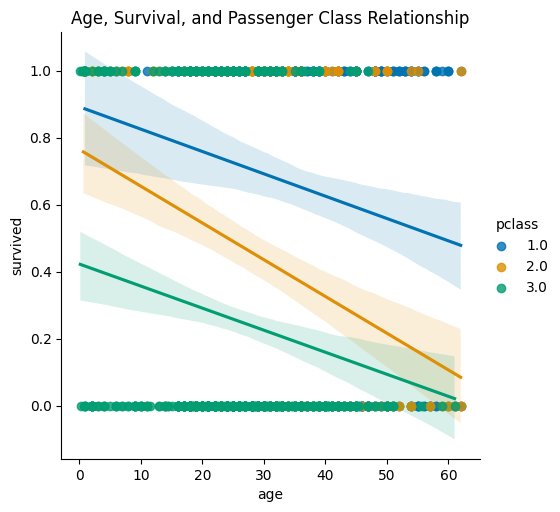

In [35]:
sns.lmplot(data=titanic, x='age', y='survived', hue='pclass', palette='colorblind')
plt.title('Age, Survival, and Passenger Class Relationship') # Yaş, Hayatta Kalma ve Yolcu Sınıfı İlişkisi

Text(0.5, 1.0, 'Age, Survival, and Gender Interrelation')

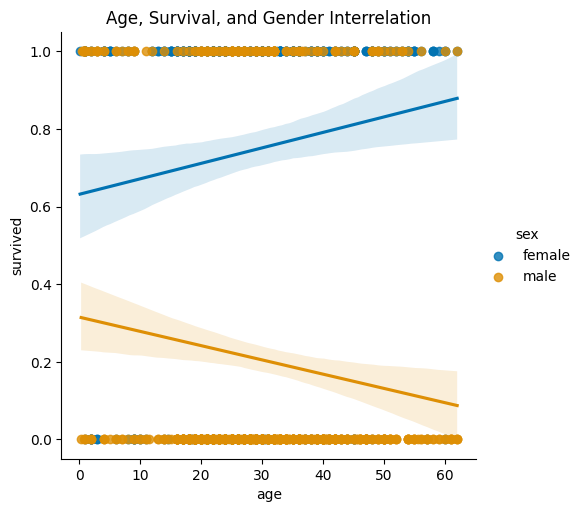

In [36]:
sns.lmplot(data=titanic, x='age', y='survived', hue='sex', palette='colorblind')
plt.title('Age, Survival, and Gender Interrelation') # Yaş, Hayatta Kalma ve Cinsiyet İlişkisi

In [37]:
#Önişeleme
titanic['age'] = titanic['age'].fillna(0)
titanic['fare'] = titanic ['fare'].fillna(0)
titanic['survived'] = titanic ['survived'].fillna(0)
titanic['sibsp'] = titanic ['sibsp'].fillna(0)
titanic['parch'] = titanic ['parch'].fillna(0)


titanic['embarked'].fillna('S', inplace = True)
titanic['sex'].fillna('female', inplace=True)



titanic.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [38]:

titanic['sex'] = titanic['sex'].replace(['female'], 0)
titanic['sex'] = titanic['sex'].replace(['male'], 1)


titanic['embarked'] = titanic['embarked'].replace(['S'], 0)
titanic['embarked'] = titanic['embarked'].replace(['C'], 1)
titanic['embarked'] = titanic['embarked'].replace(['Q'], 2)

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1004 non-null   float64
 1   survived  1004 non-null   int64  
 2   name      1004 non-null   object 
 3   sex       1004 non-null   int64  
 4   age       1004 non-null   float64
 5   sibsp     1004 non-null   float64
 6   parch     1004 non-null   float64
 7   ticket    1004 non-null   object 
 8   fare      1004 non-null   float64
 9   embarked  1004 non-null   int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 78.6+ KB


Model Doğruluğu: 0.8180

Metrikler:
Doğruluk: 0.8241
Hassasiyet: 0.8272
Duyarlılık: 0.7614
F-Skor: 0.7929


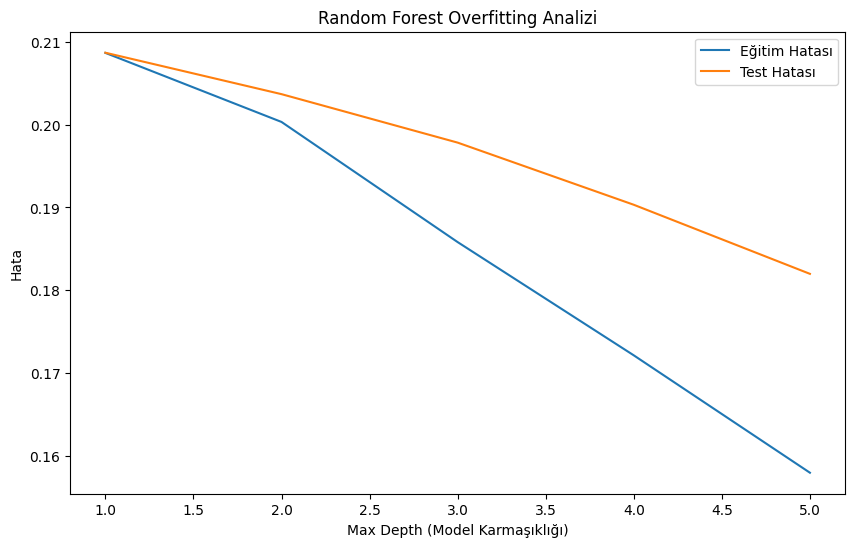

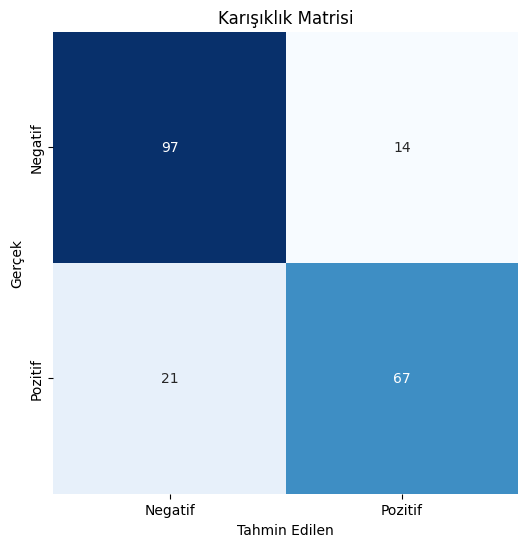

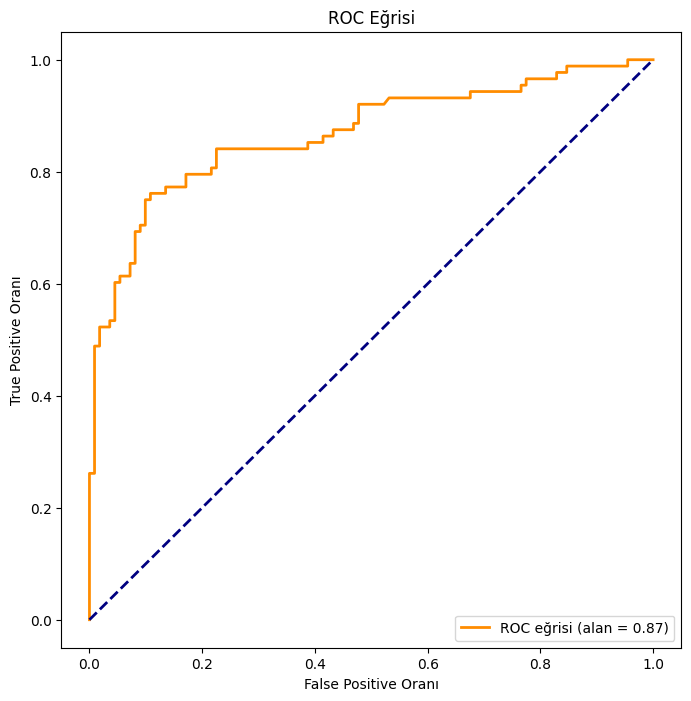

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE


X = titanic.drop(['survived', 'name', 'ticket', 'embarked'], axis=1).values

Y = titanic['survived'].values


sm = SMOTE(random_state=41)
X, Y = sm.fit_resample(X, Y)


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


max_depth_values = range(1, 6)


train_errors = []
test_errors = []


kf = KFold(n_splits=6, random_state=29, shuffle=True)

for max_depth in max_depth_values:

    train_error_folds = []
    test_error_folds = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]


        rf_model = RandomForestClassifier(n_estimators=70, max_depth=max_depth, random_state=42)


        rf_model.fit(X_train, y_train)
        y_train_pred = rf_model.predict(X_train)
        train_error = 1 - accuracy_score(y_train, y_train_pred)
        train_error_folds.append(train_error)


        y_test_pred = rf_model.predict(X_test)
        test_error = 1 - accuracy_score(y_test, y_test_pred)
        test_error_folds.append(test_error)


    train_errors.append(np.mean(train_error_folds))
    test_errors.append(np.mean(test_error_folds))


print("Model Doğruluğu: {:.4f}".format(1 - test_errors[-1]))


best_max_depth = max_depth_values[np.argmin(test_errors)]
rf_model = RandomForestClassifier(n_estimators=70, max_depth=best_max_depth, random_state=42)
rf_model.fit(X_train, y_train)


y_test_pred_proba = rf_model.predict_proba(X_test)[:, 1]


y_test_bin = label_binarize(y_test, classes=[0, 1])


fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)
accuracy = accuracy_score(y_test, rf_model.predict(X_test))
recall = recall_score(y_test, rf_model.predict(X_test))
precision = precision_score(y_test, rf_model.predict(X_test))
f1 = f1_score(y_test, rf_model.predict(X_test))


print("\nMetrikler:")
print("Doğruluk: {:.4f}".format(accuracy))
print("Hassasiyet: {:.4f}".format(precision))
print("Duyarlılık: {:.4f}".format(recall))
print("F-Skor: {:.4f}".format(f1))


plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_errors, label='Eğitim Hatası')
plt.plot(max_depth_values, test_errors, label='Test Hatası')
plt.xlabel('Max Depth (Model Karmaşıklığı)')
plt.ylabel('Hata')
plt.title('Random Forest Overfitting Analizi')
plt.legend()
plt.show()


labels = ["Negatif", "Pozitif"]
conf_matrix = confusion_matrix(y_test, rf_model.predict(X_test))
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()


plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC eğrisi (alan = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc='lower right')
plt.show()


<ipython-input-40-f2b988c8d773>:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot()
<ipython-input-40-f2b988c8d773>:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot()
<ipython-input-40-f2b988c8d773>:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot()



Max Depth: 1
Model Accuracy: 77.26%
Recall: 0.7303%
Precision: 0.8222%
F1-Score: 0.7729%

Max Depth: 2
Model Accuracy: 78.26%
Recall: 0.7687%
Precision: 0.8099%
F1-Score: 0.7880%

Max Depth: 3
Model Accuracy: 80.94%
Recall: 0.7337%
Precision: 0.8710%
F1-Score: 0.7932%

Max Depth: 4
Model Accuracy: 80.60%
Recall: 0.7695%
Precision: 0.8565%
F1-Score: 0.8088%


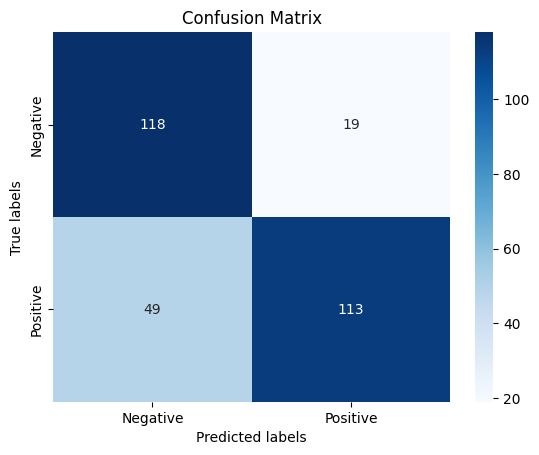

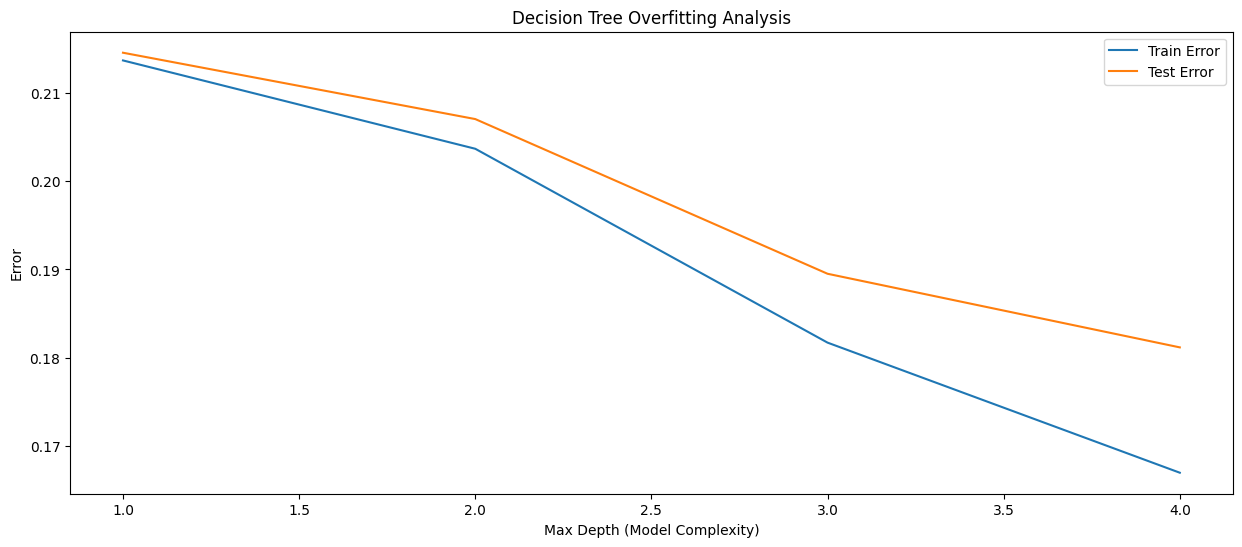

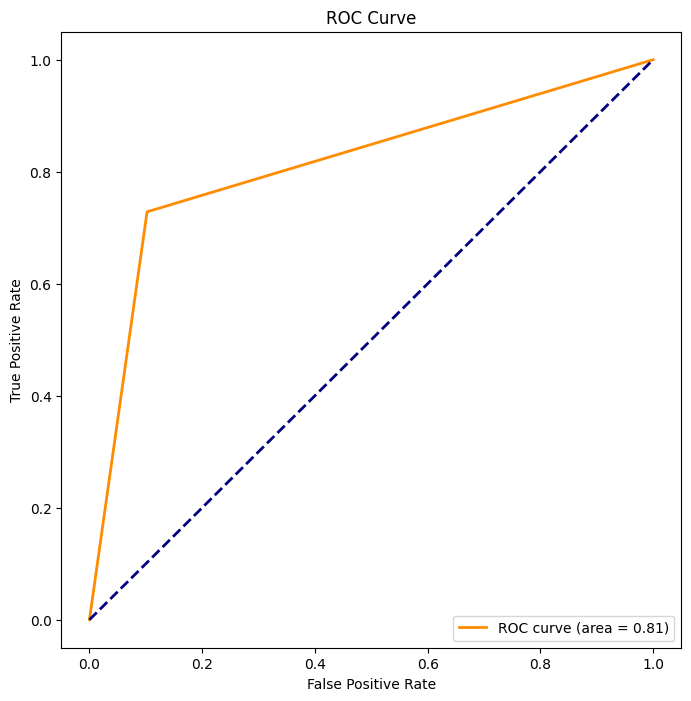

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE


X = titanic.drop(['survived', 'name', 'ticket', 'embarked'], axis=1).values
Y = titanic['survived'].values


sm = SMOTE(random_state=47)
X, Y = sm.fit_resample(X, Y)


max_depth_values = range(1, 5)


train_errors = []
test_errors = []
precision_values = []
recall_values = []
f1_score_values = []


kf = KFold(n_splits=4, random_state=35, shuffle=True)

def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax, xticklabels=labels, yticklabels=labels)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')

for max_depth in max_depth_values:
    train_error_folds = []
    test_error_folds = []
    precision_scores_folds = []
    recall_scores_folds = []
    f1_scores_folds = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)


        dt_model.fit(X_train, y_train)
        y_train_pred = dt_model.predict(X_train)
        train_error = 1 - accuracy_score(y_train, y_train_pred)
        train_error_folds.append(train_error)


        y_test_pred = dt_model.predict(X_test)
        test_error = 1 - accuracy_score(y_test, y_test_pred)
        test_error_folds.append(test_error)


        precision = precision_score(y_test, y_test_pred)
        recall = recall_score(y_test, y_test_pred)
        f1 = f1_score(y_test, y_test_pred)

        precision_scores_folds.append(precision)
        recall_scores_folds.append(recall)
        f1_scores_folds.append(f1)


        if max_depth == 1:
            plot_confusion_matrix(y_test, y_test_pred, labels=['Negative', 'Positive'])


    train_errors.append(np.mean(train_error_folds))
    test_errors.append(np.mean(test_error_folds))
    precision_values.append(np.mean(precision_scores_folds))
    recall_values.append(np.mean(recall_scores_folds))
    f1_score_values.append(np.mean(f1_scores_folds))


    accuracy = accuracy_score(y_test, y_test_pred)
    print(f'\nMax Depth: {max_depth}')
    print(f'Model Accuracy: {accuracy * 100:.2f}%')
    print(f'Recall: {np.mean(recall_scores_folds):.4f}%')
    print(f'Precision: {np.mean(precision_scores_folds):.4f}%')
    print(f'F1-Score: {np.mean(f1_scores_folds):.4f}%')


plt.figure(figsize=(15, 6))

plt.subplot(1, 1, 1)
plt.plot(max_depth_values, train_errors, label='Train Error')
plt.plot(max_depth_values, test_errors, label='Test Error')
plt.xlabel('Max Depth (Model Complexity)')
plt.ylabel('Error')
plt.title('Decision Tree Overfitting Analysis')
plt.legend()
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Best Hyperparameter Value: 100
Model Accuracy: 84.08%
Recall: 0.7722%
Precision: 0.8133%
F-Score: 0.7922%


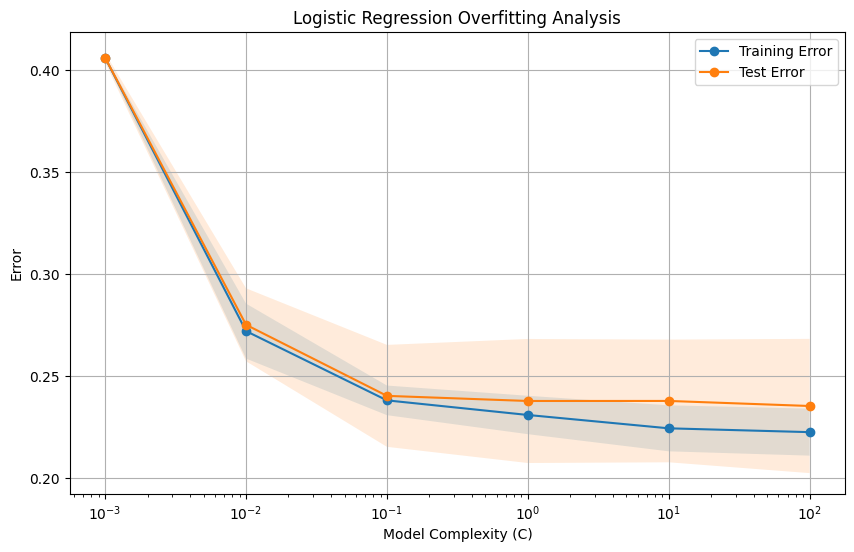

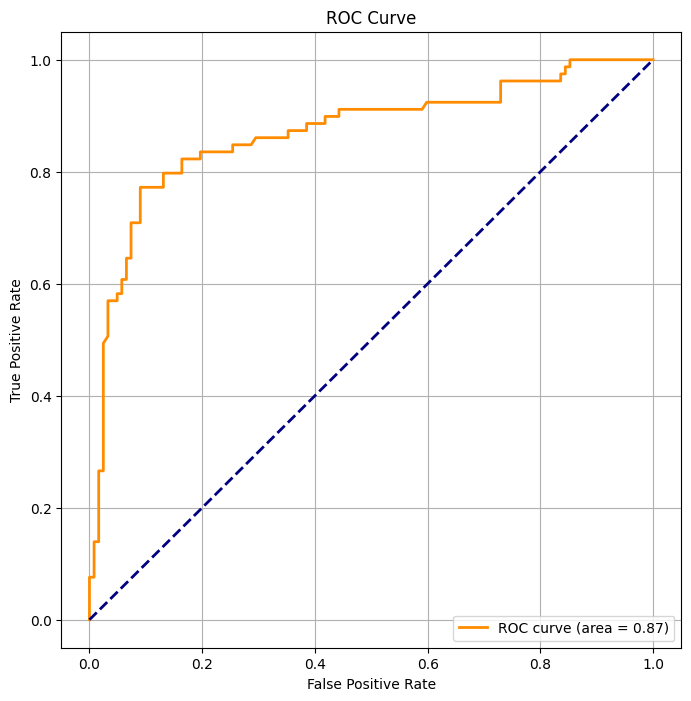

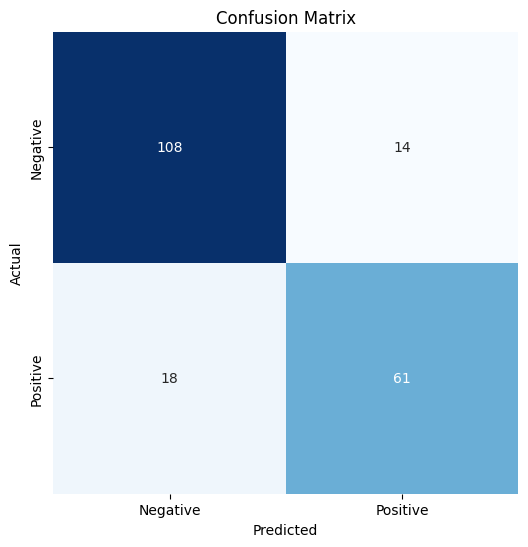

In [41]:
from sklearn.model_selection import train_test_split, validation_curve, cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix


positive_label = 'Positive'
negative_label = 'Negative'


X_unsupervised = titanic.drop(['name', 'ticket', 'survived'], axis=1)
y = titanic['survived']


X_train, X_test, y_train, y_test = train_test_split(X_unsupervised, y, test_size=0.2, random_state=43)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression()

param_range = [0.001, 0.01, 0.1, 1, 10, 100]


train_scores, test_scores = validation_curve(
    model, X_train_scaled, y_train, param_name='C', param_range=param_range,
    scoring='neg_mean_squared_error', cv=5
)


train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


best_param_index = np.argmin(test_mean)
best_param_value = param_range[best_param_index]

print(f'Best Hyperparameter Value: {best_param_value}')


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


cv_scores = cross_val_score(LogisticRegression(C=best_param_value), X_train_scaled, y_train, cv=kfold, scoring='accuracy')



model = LogisticRegression(C=best_param_value)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)


print(f'Model Accuracy: {accuracy * 100:.2f}%')


recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f'Recall: {recall:.4f}%')
print(f'Precision: {precision:.4f}%')
print(f'F-Score: {f1:.4f}%')


plt.figure(figsize=(10, 6))
plt.semilogx(param_range, train_mean, label='Training Error', marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.semilogx(param_range, test_mean, label='Test Error', marker='o')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15)

plt.title('Logistic Regression Overfitting Analysis')
plt.xlabel('Model Complexity (C)')
plt.ylabel('Error')
plt.legend(loc='best')
plt.grid(True)
plt.show()


y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=[negative_label, positive_label], columns=[negative_label, positive_label])

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [42]:
import joblib


model_filename = 'logistic_regression_model.joblib'
joblib.dump(model, model_filename)


loaded_model = joblib.load(model_filename)



In [ ]:
import joblib
import numpy as np


loaded_model = joblib.load('logistic_regression_model.joblib')


pclass = float(input("Pclass'i girin (1, 2 veya 3): "))
sex = input("Cinsiyeti girin (male veya female): ")
age = float(input("Yaşı girin: "))
sibsp = float(input("Sibsp değerini girin: "))
parch = float(input("Parch değerini girin: "))
fare = float(input("Fare değerini girin: "))
embarked = input("Embarked değerini girin (C, Q veya S): ")


sex_encoded = 1 if sex.lower() == 'female' else 0


embarked_encoded = np.zeros(3)
embarked_values = ['C', 'Q', 'S']

if embarked.upper() in embarked_values:
    embarked_index = embarked_values.index(embarked.upper())
    embarked_encoded[embarked_index] = 1
else:
    print("Geçersiz Embarked değeri. Geçerli değerler: C, Q, S")
    exit()


user_data = np.array([pclass, sex_encoded, age, sibsp, parch, fare, *embarked_encoded])


user_data_scaled = scaler.transform([user_data[:7]])


prediction = loaded_model.predict(user_data_scaled)


result = "Yaşıyor" if prediction[0] == 1 else "Öldü"

print(f'Tahmin: {result}')
